[nltk_data] Downloading package stopwords to
[nltk_data]     /home/khanhhiep/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(0, 0, 16, 20)
(0.125, 0.7126086956521739, 0.47727272727272724, 0.88)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(-0.4, 0, 0.4, 381)
(0.0, 0.0, 1.0, 1.0)
(0.6, 0, 1.4, 372)
(0.0, 0.0, 1.0, 1.0)
(1.6, 0, 2.4000000000000004, 332)
(0.0, 0.0, 1.0, 1.0)
(2.6, 0, 3.4000000000000004, 322)
(0.0, 0.0, 1.0, 1.0)
(3.6, 0, 4.4, 295)
(0.0, 0.0, 1.0, 1.0)
(4.6, 0, 5.3999999999999995, 287)
(0.0, 0.0, 1.0, 1.0)
(5.6, 0, 6.3999999999999995, 276)
(0.0, 0.0, 1.0, 1.0)
(6.6, 0, 7.3999999999999995, 276)
(0.0, 0.0, 1.0, 1.0)
(7.6, 0, 8.4, 232)
(0.0, 0.0, 1.0, 1.0)
(8.6, 0, 9.4, 165)
(0.0, 0.0, 1.0, 1.0)
(9.6, 0, 10.4, 147)
(0.0, 0.0, 1.0, 1.0)
(10.6, 0, 11.4, 137)
(0.0, 0.0, 1.0, 1.0)
(11.6, 0, 12.4, 134)
(0.0, 0.0, 1.0, 1.0)
(12.6, 0, 13.4, 124)
(0.0, 0.0, 1.0, 1.0)
(13.6, 0, 14.4, 95)
(0.0, 0.0, 1.0, 1.0)
(14.6, 0, 15.4,

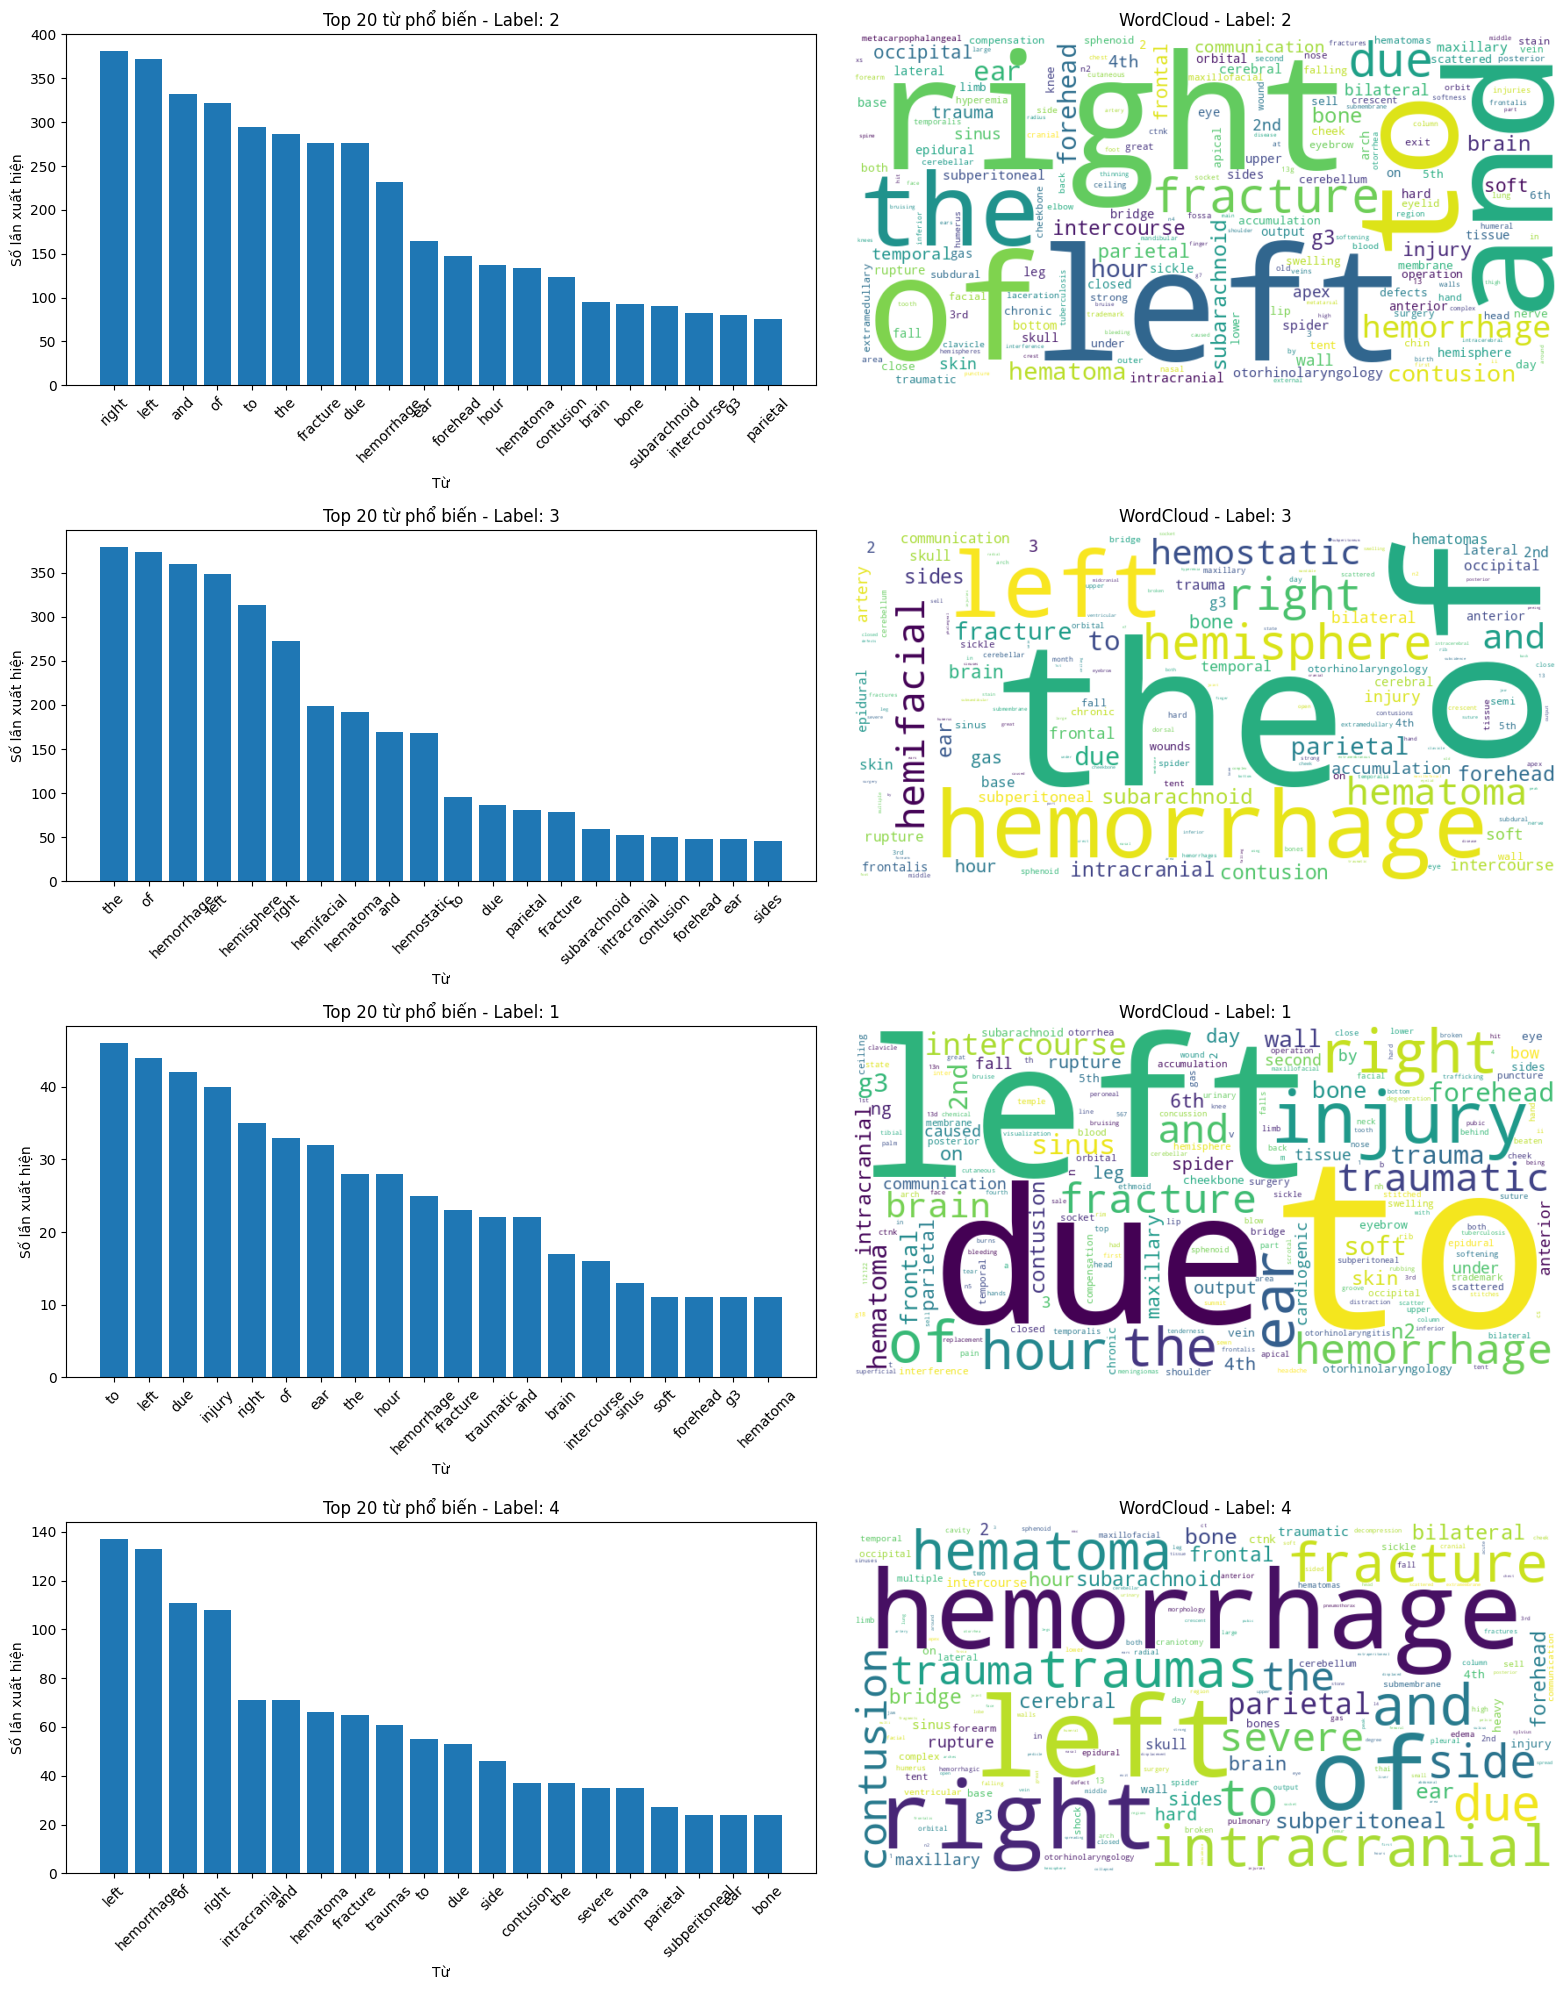

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from datasets import load_dataset
from datasets import load_dataset
from datasets import ClassLabel, Value, Features
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re
import nltk
import random
import numpy as np
import torch
from nltk.corpus import stopwords
import re
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
# Đọc file CSV
file_path = "/home/khanhhiep/Code/Khanh/Khiem/MyBachelorThesis/dataset/raw/merged_dataset.csv"
df = pd.read_csv(file_path)

# Xử lý dữ liệu: lấy 2 cột text và d_target, bỏ dòng thiếu text hoặc label
df = df[['text', 'd_target']].dropna()
df['text'] = df['text'].astype(str)

# Hàm tiền xử lý text: chuyển về lowercase, loại bỏ ký tự đặc biệt
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    return text

df['clean_text'] = df['text'].apply(preprocess_text)

# Lấy danh sách các label duy nhất
labels = df['d_target'].unique()

# Chuẩn bị plot
plt.figure(figsize=(16, 5 * len(labels)))

for i, label in enumerate(labels):
    # Lọc dữ liệu theo label
    texts = df[df['d_target'] == label]['clean_text'].tolist()

    # Gộp tất cả text thành chuỗi
    all_text = " ".join(texts)

    # Tách từ
    words = all_text.split()

    # Đếm tần suất từ
    word_counts = Counter(words)

    # Lấy top 20 từ phổ biến
    top_words = word_counts.most_common(20)
    words_, counts_ = zip(*top_words) if top_words else ([], [])

    # Vẽ biểu đồ cột
    plt.subplot(len(labels), 2, i*2 + 1)
    plt.bar(words_, counts_)
    plt.xticks(rotation=45)
    plt.title(f"Top 20 từ phổ biến - Label: {label}")
    plt.xlabel("Từ")
    plt.ylabel("Số lần xuất hiện")

    # Vẽ WordCloud
    plt.subplot(len(labels), 2, i*2 + 2)
    if word_counts:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
        plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud - Label: {label}")

plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/khanhhiep/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(0, 0, 16, 20)
(0.125, 0.7126086956521739, 0.47727272727272724, 0.88)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(-0.4, 0, 0.4, 381)
(0.0, 0.0, 1.0, 1.0)
(0.6, 0, 1.4, 372)
(0.0, 0.0, 1.0, 1.0)
(1.6, 0, 2.4000000000000004, 276)
(0.0, 0.0, 1.0, 1.0)
(2.6, 0, 3.4000000000000004, 276)
(0.0, 0.0, 1.0, 1.0)
(3.6, 0, 4.4, 232)
(0.0, 0.0, 1.0, 1.0)
(4.6, 0, 5.3999999999999995, 165)
(0.0, 0.0, 1.0, 1.0)
(5.6, 0, 6.3999999999999995, 147)
(0.0, 0.0, 1.0, 1.0)
(6.6, 0, 7.3999999999999995, 137)
(0.0, 0.0, 1.0, 1.0)
(7.6, 0, 8.4, 134)
(0.0, 0.0, 1.0, 1.0)
(8.6, 0, 9.4, 124)
(0.0, 0.0, 1.0, 1.0)
(9.6, 0, 10.4, 95)
(0.0, 0.0, 1.0, 1.0)
(10.6, 0, 11.4, 93)
(0.0, 0.0, 1.0, 1.0)
(11.6, 0, 12.4, 90)
(0.0, 0.0, 1.0, 1.0)
(12.6, 0, 13.4, 82)
(0.0, 0.0, 1.0, 1.0)
(13.6, 0, 14.4, 80)
(0.0, 0.0, 1.0, 1.0)
(14.6, 0, 15.4, 75)

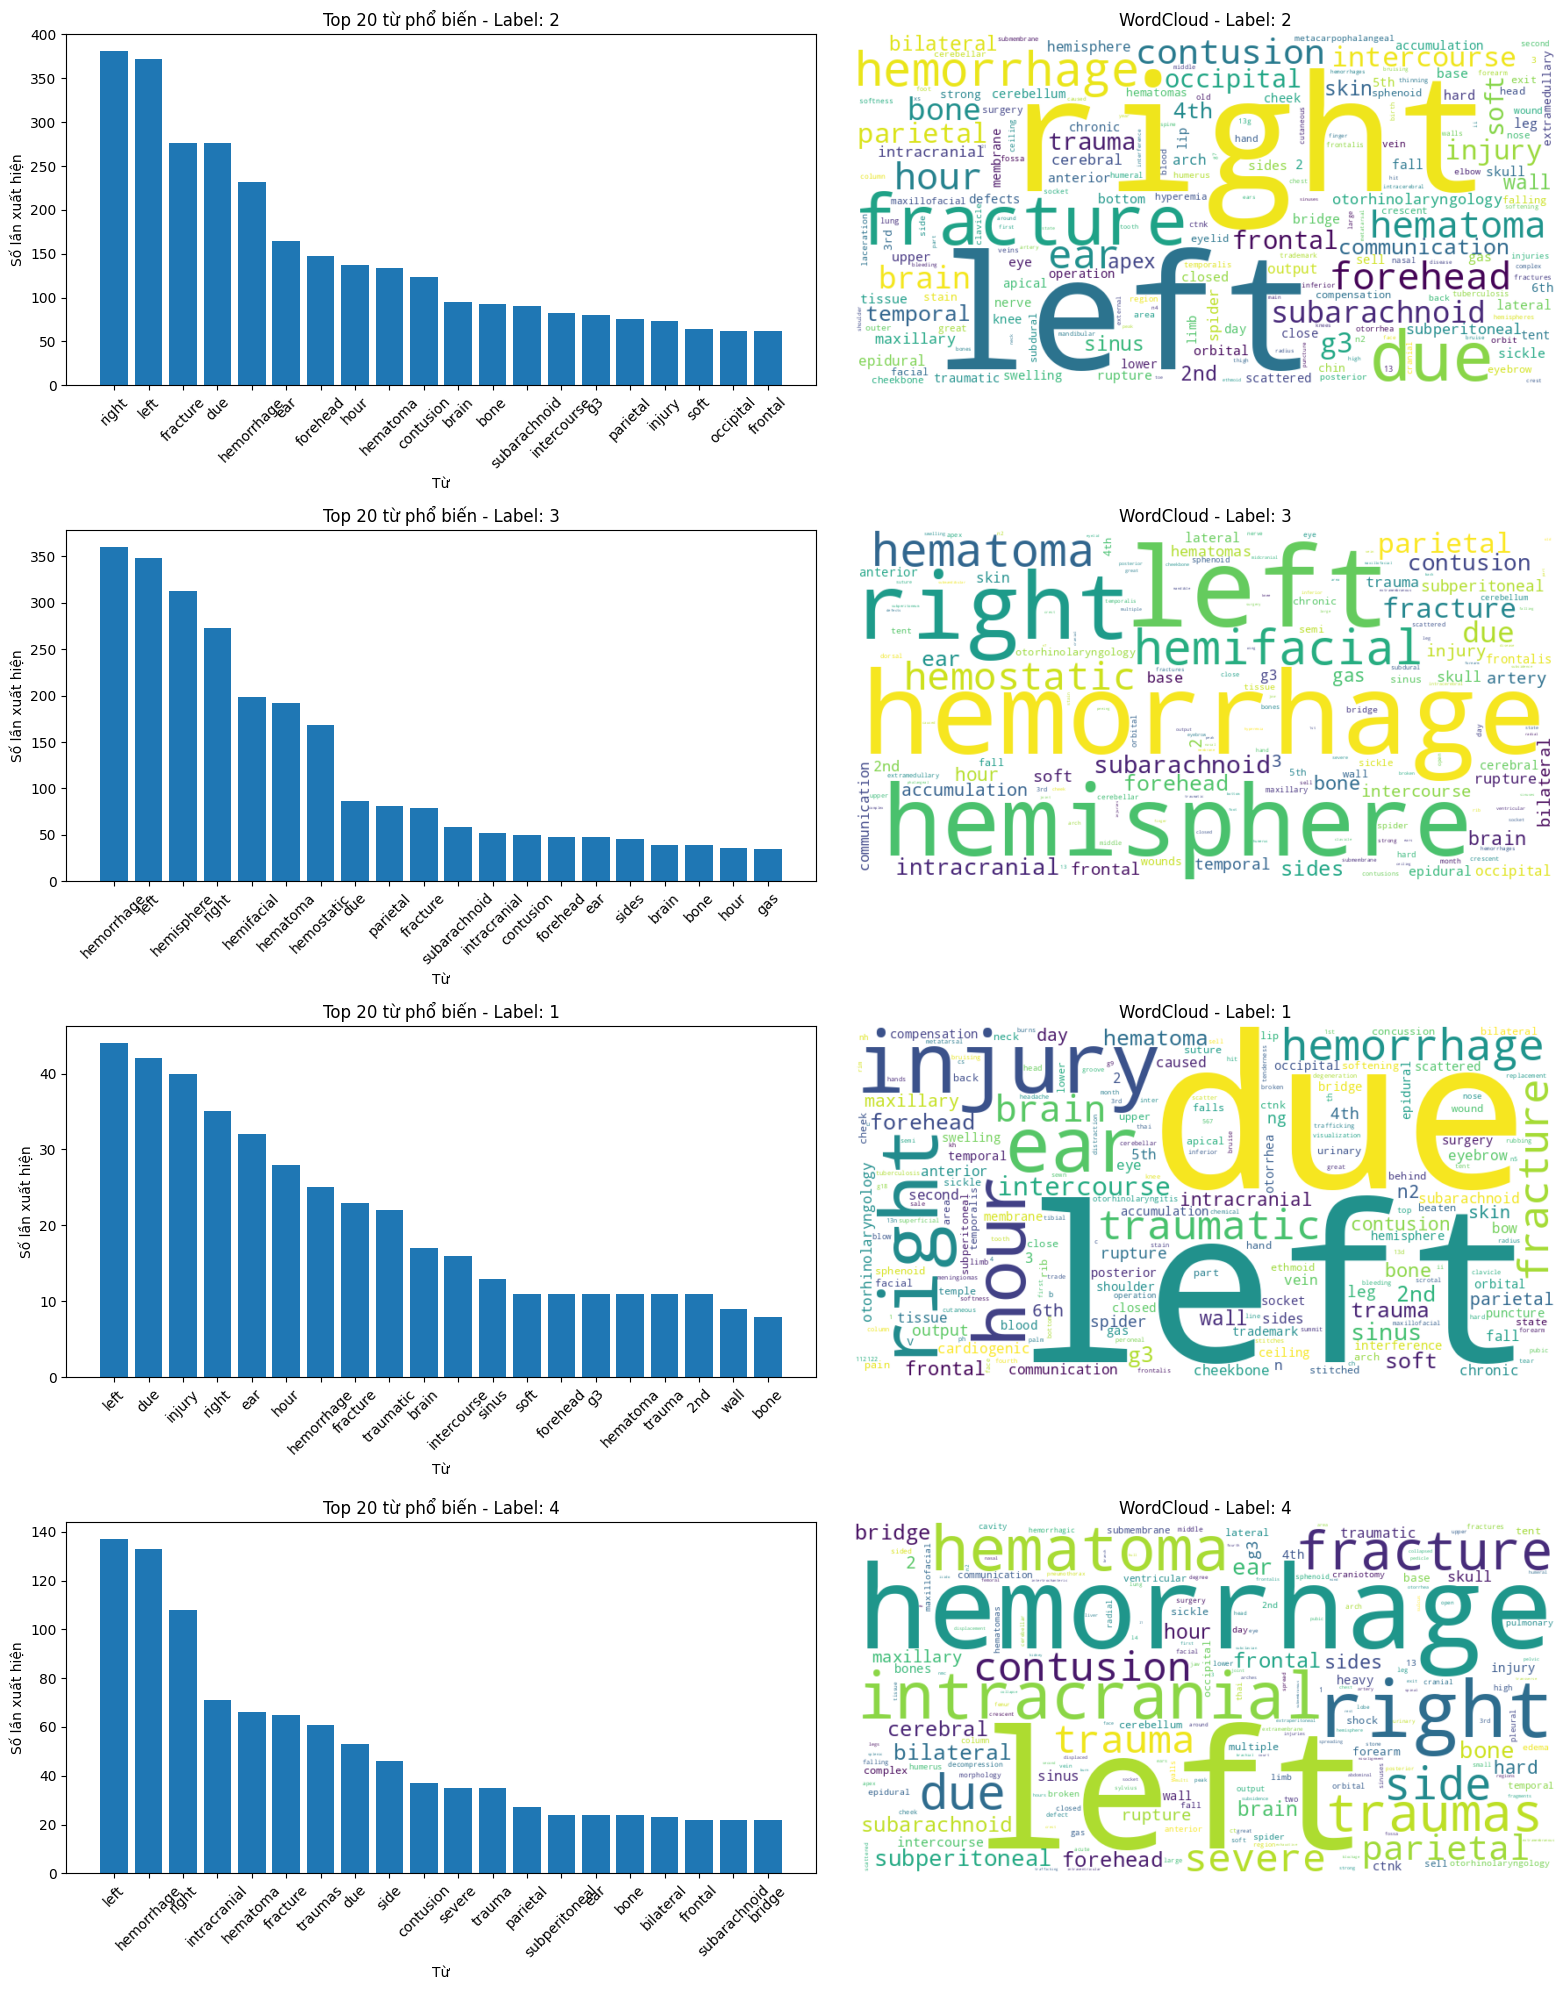

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from datasets import load_dataset
from datasets import load_dataset
from datasets import ClassLabel, Value, Features
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re
import nltk
import random
import numpy as np
import torch
from nltk.corpus import stopwords
import re
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
# Đọc file CSV
file_path = "/home/khanhhiep/Code/Khanh/Khiem/MyBachelorThesis/dataset/raw/merged_dataset.csv"
df = pd.read_csv(file_path)

# Xử lý dữ liệu: lấy 2 cột text và d_target, bỏ dòng thiếu text hoặc label
df = df[['text', 'd_target']].dropna()
df['text'] = df['text'].astype(str)

# Hàm tiền xử lý text: chuyển về lowercase, loại bỏ ký tự đặc biệt
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    words = text.split()
    # Bỏ stopwords
    words = [word for word in words if word not in stop_words]
    return " ".join(words)
df['clean_text'] = df['text'].apply(preprocess_text)

# Lấy danh sách các label duy nhất
labels = df['d_target'].unique()

# Chuẩn bị plot
plt.figure(figsize=(16, 5 * len(labels)))

for i, label in enumerate(labels):
    # Lọc dữ liệu theo label
    texts = df[df['d_target'] == label]['clean_text'].tolist()

    # Gộp tất cả text thành chuỗi
    all_text = " ".join(texts)

    # Tách từ
    words = all_text.split()

    # Đếm tần suất từ
    word_counts = Counter(words)

    # Lấy top 20 từ phổ biến
    top_words = word_counts.most_common(20)
    words_, counts_ = zip(*top_words) if top_words else ([], [])

    # Vẽ biểu đồ cột
    plt.subplot(len(labels), 2, i*2 + 1)
    plt.bar(words_, counts_)
    plt.xticks(rotation=45)
    plt.title(f"Top 20 từ phổ biến - Label: {label}")
    plt.xlabel("Từ")
    plt.ylabel("Số lần xuất hiện")

    # Vẽ WordCloud
    plt.subplot(len(labels), 2, i*2 + 2)
    if word_counts:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
        plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud - Label: {label}")

plt.tight_layout()
plt.show()


(0, 0, 10, 6)
(0.125, 0.10999999999999999, 0.9, 0.88)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(-0.4, 0, 0.4, 31)
(0.0, 0.0, 1.0, 1.0)
(0.6, 0, 1.4, 212)
(0.0, 0.0, 1.0, 1.0)
(1.6, 0, 2.4000000000000004, 124)
(0.0, 0.0, 1.0, 1.0)
(2.6, 0, 3.4000000000000004, 35)
(0, 0, 1000.0, 600.0)
(0.125, 0.10999999999999999, 0.9, 0.88)
(-4.375, -14.0, 4.375, 0.0)
(-4.4375, -14.0, 4.4375, 0.0)
(-4.375, -14.0, 4.375, 0.0)
(-4.375, -14.0, 4.375, 0.0)
(-4.375, -14.0, 4.375, 0.0)
(-4.4375, -14.0, 4.4375, 0.0)
(-4.375, -14.0, 4.375, 0.0)
(-4.375, -14.0, 4.375, 0.0)
(900.0, 38.1111111111111, 900.0, 38.1111111111111)
(-18.8125, -14.0, 18.8125, 0.0)
16
16
16
16
(-8.75, -8.5, 0.0, 5.5)
(-17.5, -8.5, 0.0, 5.5)
(-17.5, -8.5, 0.0, 5.5)
(-17.5, -8.5, 0.0, 5.5)
(-26.375, -8.5, 0.0, 5.5)
(-26.375, -8.5, 0.0, 5.5)
(-26.375, -8.5

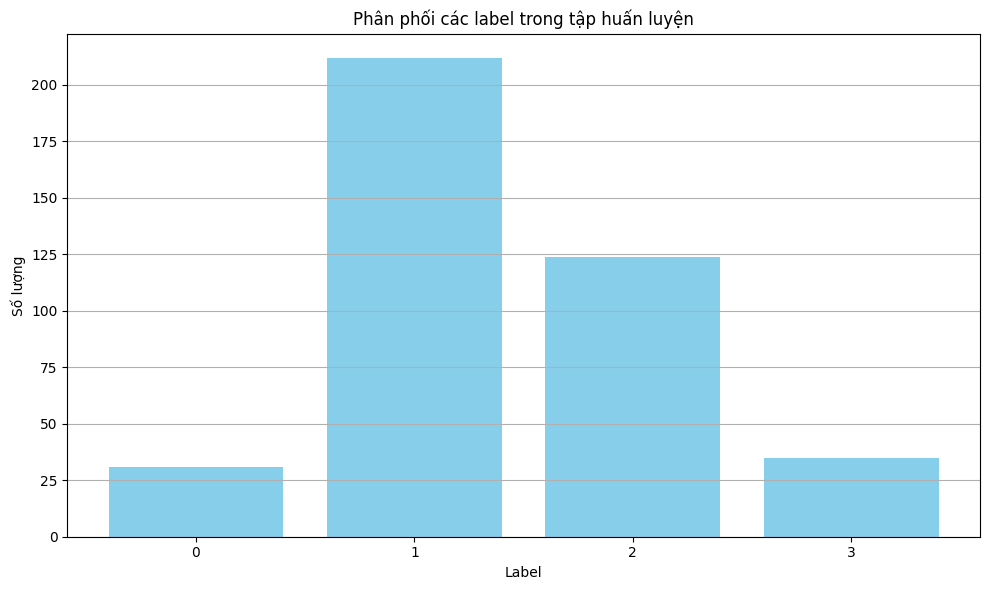

In [5]:
#plot distribution of labels of /home/khanhhiep/Code/Khanh/Khiem/MyBachelorThesis/dataset/text_modality/train.csv theo thứ tự 0 1 2 3
file_path = "/home/khanhhiep/Code/Khanh/Khiem/MyBachelorThesis/dataset/text_modality/train.csv"
df = pd.read_csv(file_path)
# Xử lý dữ liệu: lấy 2 cột text và d_target, bỏ dòng thiếu text hoặc label
df = df[['text', 'label']].dropna()
df['text'] = df['text'].astype(str)
# Đếm số lượng mỗi label
label_counts = df['label'].value_counts().sort_index()
# Vẽ biểu đồ phân phối
plt.figure(figsize=(10, 6))
plt.bar(label_counts.index, label_counts.values, color='skyblue')
plt.xlabel('Label')
plt.ylabel('Số lượng')
plt.title('Phân phối các label trong tập huấn luyện')
plt.xticks(label_counts.index, [str(i) for i in label_counts.index])
plt.grid(axis='y')
plt.tight_layout()
plt.show()
#plot distribution of labels of /home/khanhhiep/Code/Khanh/Khiem/MyBachelorThesis/dataset/text_modality/val.csv theo thứ tự 0 1 2 3
#plot distribution of labels of /home/khanhhiep/Code/Khanh/Khiem/MyBachelorThesis/dataset/text_modality/test.csv

In [6]:
# plot cho tôi 

(0, 0, 12, 7)
(0.125, 0.10999999999999999, 0.9, 0.88)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
[(<matplotlib.offsetbox.DrawingArea object at 0x7f3447b77690>, <matplotlib.offsetbox.TextArea object at 0x7f3447a9e490>), (<matplotlib.offsetbox.DrawingArea object at 0x7f3447a9f710>, <matplotlib.offsetbox.TextArea object at 0x7f3447a9efd0>), (<matplotlib.offsetbox.DrawingArea object at 0x7f3447a9b010>, <matplotlib.offsetbox.TextArea object at 0x7f3447a9d310>), (<matplotlib.offsetbox.DrawingArea object at 0x7f3447aa4d10>, <matplotlib.offsetbox.TextArea object at 0x7f3447aa45d0>), (<matplotlib.offsetbox.DrawingArea object at 0x7f3447aa6110>, <matplotlib.offsetbox

(-31.625, -11.0, 0.0, 7.0)
(-10.5, -11.0, 0.0, 7.0)
(-21.125, -11.0, 0.0, 7.0)
(-21.125, -11.0, 0.0, 7.0)
(-21.125, -11.0, 0.0, 7.0)
(-21.0, -11.0, 0.0, 7.0)
(-21.0, -11.0, 0.0, 7.0)
(-21.0, -11.0, 0.0, 7.0)
(-21.0, -11.0, 0.0, 7.0)
(-21.0, -11.0, 0.0, 7.0)
(-21.0, -11.0, 0.0, 7.0)
(-31.625, -11.0, 0.0, 7.0)
(-19.656250000000007, -104.9375, 7.105427357601002e-15, 104.9375)
(-198.6875, -4.0, 198.6875, 19.0)
(-0.0, -0.0, 33.33333333333333, 11.666666666666664)
(0.0, -4.0, 135.5, 14.0)
(0, -4.0, 135.5, 14.0)
[0, 46.666666666666664, 148.83333333333334]
(-0.0, -4.0, 182.16666666666666, 14.0)
(-0.0, -0.0, 33.33333333333333, 11.666666666666664)
(0.0, -4.0, 131.5, 14.0)
(0, -4.0, 131.5, 14.0)
[0, 46.666666666666664, 144.83333333333334]
(-0.0, -4.0, 178.16666666666666, 14.0)
(-0.0, -0.0, 33.33333333333333, 11.666666666666664)
(0.0, -4.0, 109.25, 14.0)
(0, -4.0, 109.25, 14.0)
[0, 46.666666666666664, 122.58333333333334]
(-0.0, -4.0, 155.91666666666666, 14.0)
(-0.0, -0.0, 33.33333333333333, 11.6666

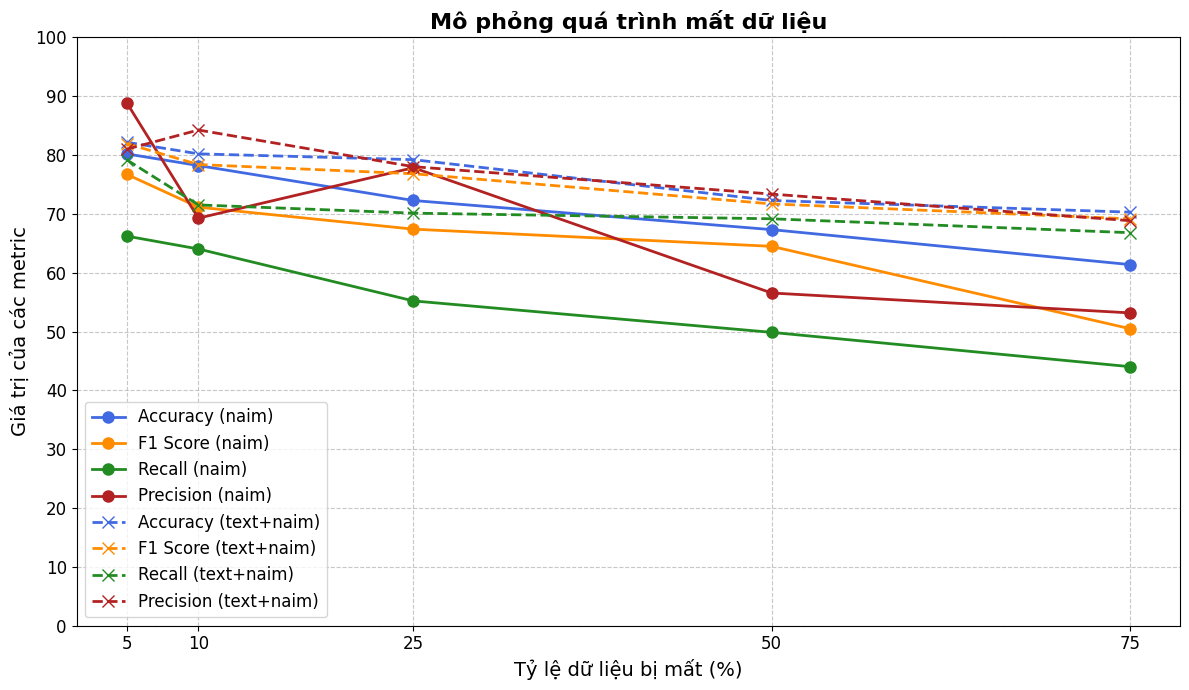

   Missing Data (%)  Accuracy  F1 Score  Recall  Precision
0                 5     80.19     76.72  66.220      88.89
1                10     78.21     71.14  64.030      69.27
2                25     72.27     67.40  55.206      77.84
3                50     67.32     64.48  49.860      56.55
4                75     61.38     50.49  44.030      53.17
5                 5     82.17     81.94  79.190      80.99
6                10     80.20     78.38  71.520      84.25
7                25     79.21     76.82  70.120      78.02
8                50     72.27     71.69  69.160      73.36
9                75     70.29     69.15  66.800      68.84


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x2 = [5, 10,25, 50, 75]
accuracy2 = [82.17,80.2, 79.21,  72.27, 70.29]
f12 = [81.94,78.38, 76.82,  71.69, 69.15]
recall2 = [79.19, 71.52, 70.12, 69.16, 66.80]
precision2 = [80.99, 84.25, 78.02, 73.36, 68.84]

# Dữ liệu mô phỏng cho nhánh naim
x = [5, 10, 25, 50, 75]
accuracy = [80.19, 78.21, 72.27, 67.32, 61.38]
f1 = [76.72, 71.14, 67.4, 64.48, 50.49]
recall = [66.22, 64.03, 55.206, 49.86, 44.03]
precision = [88.89, 69.27, 77.84, 56.55, 53.17]

# Vẽ thêm dữ liệu mô phỏng cho nhánh text+naim với nét kẻ dọc
plt.figure(figsize=(12, 7))
plt.plot(x, accuracy, marker='o', label='Accuracy (naim)', color='royalblue', linewidth=2, markersize=8)
plt.plot(x, f1, marker='o', label='F1 Score (naim)', color='darkorange', linewidth=2, markersize=8)
plt.plot(x, recall, marker='o', label='Recall (naim)', color='forestgreen', linewidth=2, markersize=8)
plt.plot(x, precision, marker='o', label='Precision (naim)', color='firebrick', linewidth=2, markersize=8)

plt.plot(x2, accuracy2, marker='x', label='Accuracy (text+naim)', color='royalblue', linewidth=2, markersize=8, linestyle='--')
plt.plot(x2, f12, marker='x', label='F1 Score (text+naim)', color='darkorange', linewidth=2, markersize=8, linestyle='--')
plt.plot(x2, recall2, marker='x', label='Recall (text+naim)', color='forestgreen', linewidth=2, markersize=8, linestyle='--')
plt.plot(x2, precision2, marker='x', label='Precision (text+naim)', color='firebrick', linewidth=2, markersize=8, linestyle='--')

plt.title('Mô phỏng quá trình mất dữ liệu', fontsize=16, fontweight='bold')
plt.xlabel('Tỷ lệ dữ liệu bị mất (%)', fontsize=14)
plt.ylabel('Giá trị của các metric', fontsize=14)
plt.xticks(x, fontsize=12)
plt.yticks(np.arange(0, 101, 10), fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Tạo bảng dữ liệu mô phỏng cho cả nhánh naim và text+naim
data_combined = {
    'Missing Data (%)': x + x2,
    'Accuracy': accuracy + accuracy2,
    'F1 Score': f1 + f12,
    'Recall': recall + recall2,
    'Precision': precision + precision2
}

df_combined = pd.DataFrame(data_combined)

# Hiển thị bảng dữ liệu
print(df_combined)


In [10]:
df.head()

,Missing Data (%),Accuracy,F1 Score,Recall,Precision
0,5,80.19,76.72,66.220,88.89
1,10,78.21,71.14,64.030,69.27
2,25,72.27,67.40,55.206,77.84
3,50,67.32,64.48,49.860,56.55
4,75,61.38,50.49,44.030,53.17


(0, 0, 14, 8)
(0.125, 0.10999999999999999, 0.9, 0.88)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(

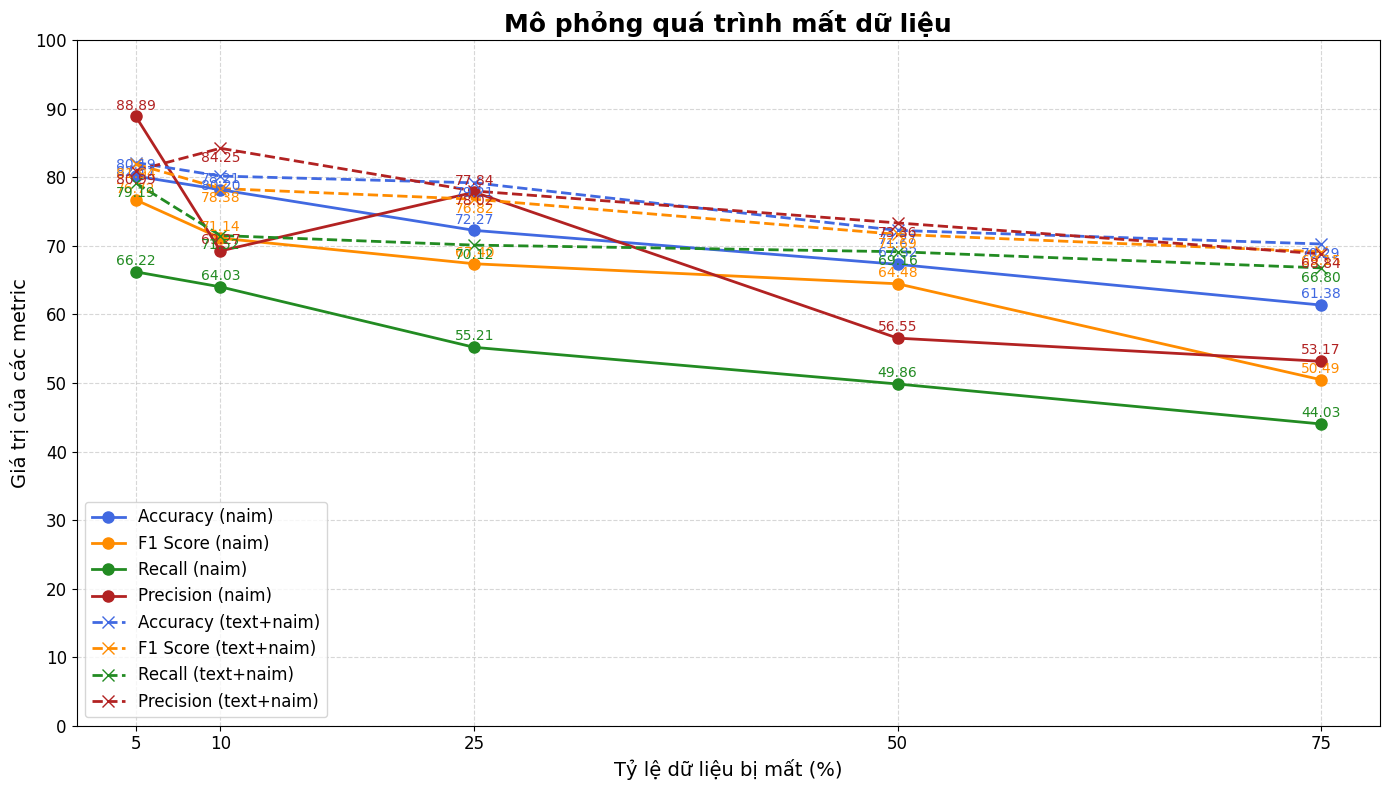

   Missing Data (%)  Accuracy  F1 Score  Recall  Precision
0                 5     80.19     76.72  66.220      88.89
1                10     78.21     71.14  64.030      69.27
2                25     72.27     67.40  55.206      77.84
3                50     67.32     64.48  49.860      56.55
4                75     61.38     50.49  44.030      53.17
5                 5     82.17     81.94  79.190      80.99
6                10     80.20     78.38  71.520      84.25
7                25     79.21     76.82  70.120      78.02
8                50     72.27     71.69  69.160      73.36
9                75     70.29     69.15  66.800      68.84


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x2 = [5, 10,25, 50, 75]
accuracy2 = [82.17,80.2, 79.21,  72.27, 70.29]
f12 = [81.94,78.38, 76.82,  71.69, 69.15]
recall2 = [79.19, 71.52, 70.12, 69.16, 66.80]
precision2 = [80.99, 84.25, 78.02, 73.36, 68.84]

# Dữ liệu mô phỏng cho nhánh naim
x = [5, 10, 25, 50, 75]
accuracy = [80.19, 78.21, 72.27, 67.32, 61.38]
f1 = [76.72, 71.14, 67.4, 64.48, 50.49]
recall = [66.22, 64.03, 55.206, 49.86, 44.03]
precision = [88.89, 69.27, 77.84, 56.55, 53.17]

# Vẽ thêm dữ liệu mô phỏng cho nhánh text+naim với nét kẻ dọc
plt.figure(figsize=(14, 8))
plt.plot(x, accuracy, marker='o', label='Accuracy (naim)', color='royalblue', linewidth=2, markersize=8)
plt.plot(x, f1, marker='o', label='F1 Score (naim)', color='darkorange', linewidth=2, markersize=8)
plt.plot(x, recall, marker='o', label='Recall (naim)', color='forestgreen', linewidth=2, markersize=8)
plt.plot(x, precision, marker='o', label='Precision (naim)', color='firebrick', linewidth=2, markersize=8)

plt.plot(x2, accuracy2, marker='x', label='Accuracy (text+naim)', color='royalblue', linewidth=2, markersize=8, linestyle='--')
plt.plot(x2, f12, marker='x', label='F1 Score (text+naim)', color='darkorange', linewidth=2, markersize=8, linestyle='--')
plt.plot(x2, recall2, marker='x', label='Recall (text+naim)', color='forestgreen', linewidth=2, markersize=8, linestyle='--')
plt.plot(x2, precision2, marker='x', label='Precision (text+naim)', color='firebrick', linewidth=2, markersize=8, linestyle='--')

# Thêm nhãn vào các điểm dữ liệu
for i in range(len(x)):
    plt.text(x[i], accuracy[i] + 1, f'{accuracy[i]:.2f}', ha='center', fontsize=10, color='royalblue')
    plt.text(x[i], f1[i] + 1, f'{f1[i]:.2f}', ha='center', fontsize=10, color='darkorange')
    plt.text(x[i], recall[i] + 1, f'{recall[i]:.2f}', ha='center', fontsize=10, color='forestgreen')
    plt.text(x[i], precision[i] + 1, f'{precision[i]:.2f}', ha='center', fontsize=10, color='firebrick')

for i in range(len(x2)):
    plt.text(x2[i], accuracy2[i] - 2, f'{accuracy2[i]:.2f}', ha='center', fontsize=10, color='royalblue')
    plt.text(x2[i], f12[i] - 2, f'{f12[i]:.2f}', ha='center', fontsize=10, color='darkorange')
    plt.text(x2[i], recall2[i] - 2, f'{recall2[i]:.2f}', ha='center', fontsize=10, color='forestgreen')
    plt.text(x2[i], precision2[i] - 2, f'{precision2[i]:.2f}', ha='center', fontsize=10, color='firebrick')

plt.title('Mô phỏng quá trình mất dữ liệu', fontsize=18, fontweight='bold')
plt.xlabel('Tỷ lệ dữ liệu bị mất (%)', fontsize=14)
plt.ylabel('Giá trị của các metric', fontsize=14)
plt.xticks(x, fontsize=12)
plt.yticks(np.arange(0, 101, 10), fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Tạo bảng dữ liệu mô phỏng cho cả nhánh naim và text+naim
data_combined = {
    'Missing Data (%)': x + x2,
    'Accuracy': accuracy + accuracy2,
    'F1 Score': f1 + f12,
    'Recall': recall + recall2,
    'Precision': precision + precision2
}

df_combined = pd.DataFrame(data_combined)

# Hiển thị bảng dữ liệu
print(df_combined)


(0, 0, 14, 8)
(0.125, 0.10999999999999999, 0.9, 0.88)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
[(<matplotlib.offsetbox.DrawingArea object at 0x7f3444278fd0>, <matplotlib.offsetbox.TextArea object at 0x7f34442ad310>), (<matplotlib.offsetbox.DrawingArea object at 0x7f34442ae490>, <matplotlib.offsetbox.TextArea object at 0x7f344427e910>), (<matplotlib.offsetbox.DrawingArea object at 0x7f34442af810>, <matplotlib.offsetbox.TextArea object at 0x7f34442af0d0>), (<matplotlib.offsetbox.DrawingArea object at 0x7f34442b0c90>, <matplotlib.offsetbox.TextArea object at 0x7f34442b0550>), (<matplotlib.offsetbox.DrawingArea object at 0x7f34442b20d0>, <matplotlib.offsetbox

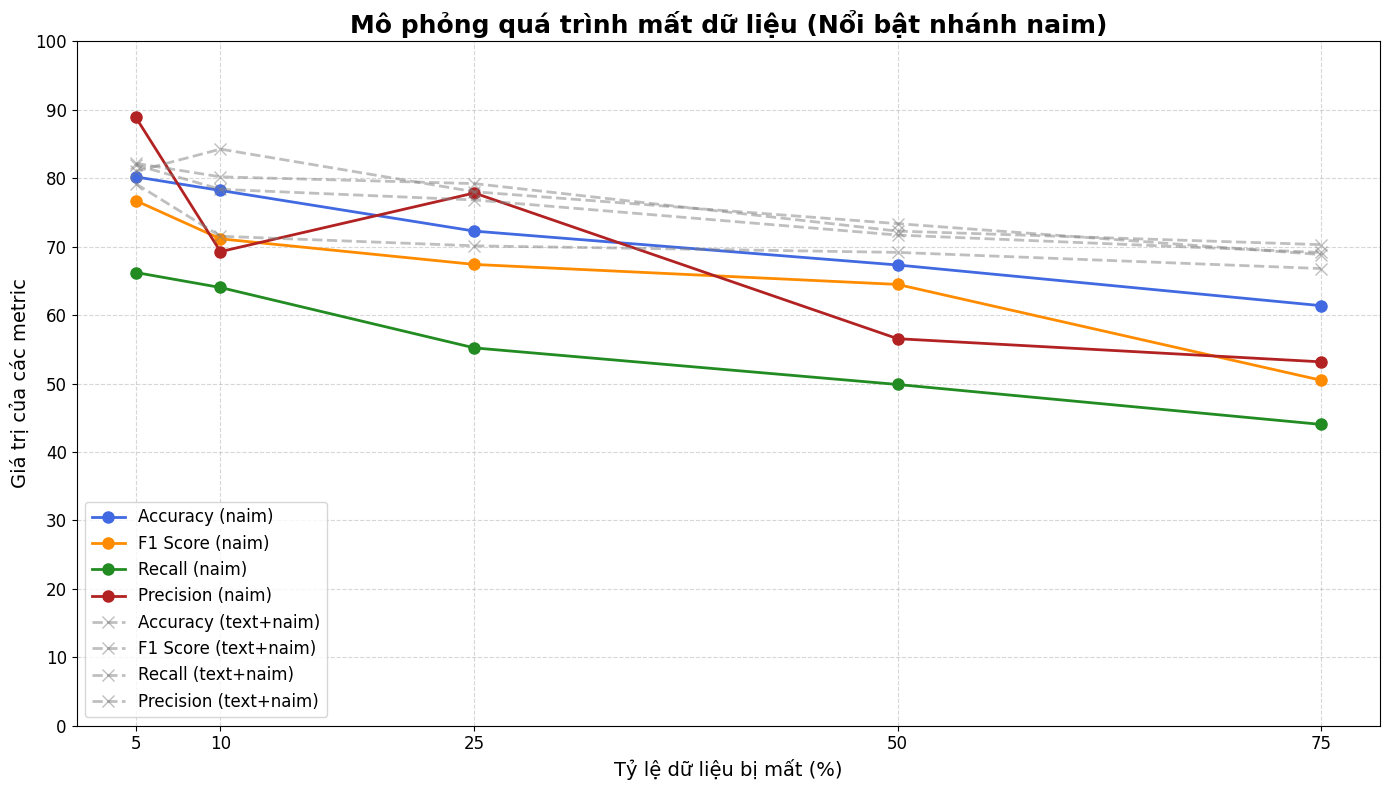

(0, 0, 14, 8)
(0.125, 0.10999999999999999, 0.9, 0.88)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.0, 1.0, 1.0)
[(<matplotlib.offsetbox.DrawingArea object at 0x7f3445516dd0>, <matplotlib.offsetbox.TextArea object at 0x7f34455169d0>), (<matplotlib.offsetbox.DrawingArea object at 0x7f3445516b10>, <matplotlib.offsetbox.TextArea object at 0x7f3445517e50>), (<matplotlib.offsetbox.DrawingArea object at 0x7f3445515f50>, <matplotlib.offsetbox.TextArea object at 0x7f34455148d0>), (<matplotlib.offsetbox.DrawingArea object at 0x7f34454f9350>, <matplotlib.offsetbox.TextArea object at 0x7f3445517090>), (<matplotlib.offsetbox.DrawingArea object at 0x7f34454fbb50>, <matplotlib.offsetbox

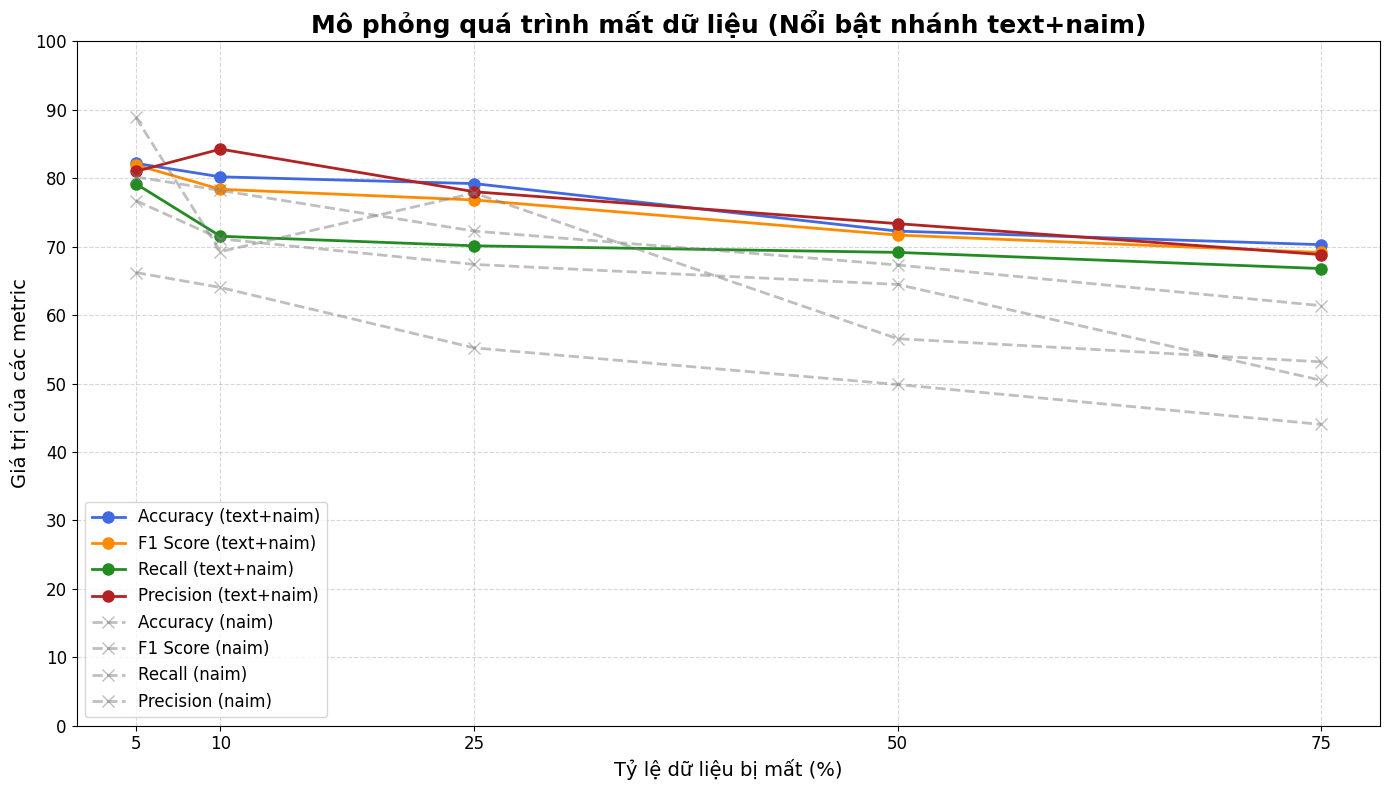

   Missing Data (%)  Accuracy  F1 Score  Recall  Precision
0                 5     80.19     76.72  66.220      88.89
1                10     78.21     71.14  64.030      69.27
2                25     72.27     67.40  55.206      77.84
3                50     67.32     64.48  49.860      56.55
4                75     61.38     50.49  44.030      53.17
5                 5     82.17     81.94  79.190      80.99
6                10     80.20     78.38  71.520      84.25
7                25     79.21     76.82  70.120      78.02
8                50     72.27     71.69  69.160      73.36
9                75     70.29     69.15  66.800      68.84


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dữ liệu mô phỏng cho nhánh text+naim
x2 = [5, 10,25, 50, 75]
accuracy2 = [82.17,80.2, 79.21,  72.27, 70.29]
f12 = [81.94,78.38, 76.82,  71.69, 69.15]
recall2 = [79.19, 71.52, 70.12, 69.16, 66.80]
precision2 = [80.99, 84.25, 78.02, 73.36, 68.84]

# Dữ liệu mô phỏng cho nhánh naim
x = [5, 10, 25, 50, 75]
accuracy = [80.19, 78.21, 72.27, 67.32, 61.38]
f1 = [76.72, 71.14, 67.4, 64.48, 50.49]
recall = [66.22, 64.03, 55.206, 49.86, 44.03]
precision = [88.89, 69.27, 77.84, 56.55, 53.17]

# Figure 1: Làm mờ dữ liệu mô phỏng cho text+naim để nổi bật naim
plt.figure(figsize=(14, 8))
# Vẽ dữ liệu mô phỏng nhánh naim với độ mờ thấp
plt.plot(x, accuracy, marker='o', label='Accuracy (naim)', color='royalblue', linewidth=2, markersize=8)
plt.plot(x, f1, marker='o', label='F1 Score (naim)', color='darkorange', linewidth=2, markersize=8)
plt.plot(x, recall, marker='o', label='Recall (naim)', color='forestgreen', linewidth=2, markersize=8)
plt.plot(x, precision, marker='o', label='Precision (naim)', color='firebrick', linewidth=2, markersize=8)

# Vẽ dữ liệu mô phỏng nhánh text+naim với độ mờ
plt.plot(x2, accuracy2, marker='x', label='Accuracy (text+naim)', color='gray', alpha=0.5, linewidth=2, markersize=8, linestyle='--')
plt.plot(x2, f12, marker='x', label='F1 Score (text+naim)', color='gray', alpha=0.5, linewidth=2, markersize=8, linestyle='--')
plt.plot(x2, recall2, marker='x', label='Recall (text+naim)', color='gray', alpha=0.5, linewidth=2, markersize=8, linestyle='--')
plt.plot(x2, precision2, marker='x', label='Precision (text+naim)', color='gray', alpha=0.5, linewidth=2, markersize=8, linestyle='--')

plt.title('Mô phỏng quá trình mất dữ liệu (Nổi bật nhánh naim)', fontsize=18, fontweight='bold')
plt.xlabel('Tỷ lệ dữ liệu bị mất (%)', fontsize=14)
plt.ylabel('Giá trị của các metric', fontsize=14)
plt.xticks(x, fontsize=12)
plt.yticks(np.arange(0, 101, 10), fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Figure 2: Làm mờ dữ liệu mô phỏng cho nhánh naim để nổi bật text+naim
plt.figure(figsize=(14, 8))
# Vẽ dữ liệu mô phỏng nhánh text+naim với độ mờ thấp
plt.plot(x2, accuracy2, marker='o', label='Accuracy (text+naim)', color='royalblue', linewidth=2, markersize=8)
plt.plot(x2, f12, marker='o', label='F1 Score (text+naim)', color='darkorange', linewidth=2, markersize=8)
plt.plot(x2, recall2, marker='o', label='Recall (text+naim)', color='forestgreen', linewidth=2, markersize=8)
plt.plot(x2, precision2, marker='o', label='Precision (text+naim)', color='firebrick', linewidth=2, markersize=8)

# Vẽ dữ liệu mô phỏng nhánh naim với độ mờ
plt.plot(x, accuracy, marker='x', label='Accuracy (naim)', color='gray', alpha=0.5, linewidth=2, markersize=8, linestyle='--')
plt.plot(x, f1, marker='x', label='F1 Score (naim)', color='gray', alpha=0.5, linewidth=2, markersize=8, linestyle='--')
plt.plot(x, recall, marker='x', label='Recall (naim)', color='gray', alpha=0.5, linewidth=2, markersize=8, linestyle='--')
plt.plot(x, precision, marker='x', label='Precision (naim)', color='gray', alpha=0.5, linewidth=2, markersize=8, linestyle='--')

plt.title('Mô phỏng quá trình mất dữ liệu (Nổi bật nhánh text+naim)', fontsize=18, fontweight='bold')
plt.xlabel('Tỷ lệ dữ liệu bị mất (%)', fontsize=14)
plt.ylabel('Giá trị của các metric', fontsize=14)
plt.xticks(x, fontsize=12)
plt.yticks(np.arange(0, 101, 10), fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Tạo bảng dữ liệu mô phỏng cho cả nhánh naim và text+naim
data_combined = {
    'Missing Data (%)': x + x2,
    'Accuracy': accuracy + accuracy2,
    'F1 Score': f1 + f12,
    'Recall': recall + recall2,
    'Precision': precision + precision2
}

df_combined = pd.DataFrame(data_combined)

# Hiển thị bảng dữ liệu
print(df_combined)


In [7]:
df_combined.head()

,Missing Data (%),Accuracy,F1 Score,Recall,Precision
0,5,80.19,76.72,66.220,88.89
1,10,78.21,71.14,64.030,69.27
2,25,72.27,67.40,55.206,77.84
3,50,67.32,64.48,49.860,56.55
4,75,61.38,50.49,44.030,53.17
